<a href="https://colab.research.google.com/github/skytecat/PredictingRoadAccidentRisk/blob/main/road_accident_risk_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Road_risk/train.csv')

In [3]:
data

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [4]:
data = data.drop('id', axis=1)

In [5]:
data['road_signs_present'] = data['road_signs_present'].astype(int)
data['public_road'] = data['public_road'].astype(int)
data['holiday'] = data['holiday'].astype(int)
data['school_season'] = data['school_season'].astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  int64  
 7   public_road             517754 non-null  int64  
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  int64  
 10  school_season           517754 non-null  int64  
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 51.4+ MB


In [7]:
data

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,0,1,afternoon,0,1,1,0.13
1,urban,4,0.99,35,daylight,clear,1,0,evening,1,1,0,0.35
2,rural,4,0.63,70,dim,clear,0,1,morning,1,0,2,0.30
3,highway,4,0.07,35,dim,rainy,1,1,morning,0,0,1,0.21
4,rural,1,0.58,60,daylight,foggy,0,0,evening,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,highway,4,0.10,70,daylight,foggy,1,1,afternoon,0,0,2,0.32
517750,rural,4,0.47,35,daylight,rainy,1,1,morning,0,0,1,0.26
517751,urban,4,0.62,25,daylight,foggy,0,0,afternoon,0,1,0,0.19
517752,highway,3,0.63,25,night,clear,1,0,afternoon,1,1,3,0.51


## Анализ численных атрибутов

In [8]:
numerical_data = data.select_dtypes(include=['number'])

In [9]:
numerical_data.describe()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,0.499204,0.502256,0.503498,0.497514,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.500000,0.499995,0.499988,0.499994,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [10]:
numerical_data.isnull().sum()

,0
num_lanes,0
curvature,0
speed_limit,0
road_signs_present,0
public_road,0
holiday,0
school_season,0
num_reported_accidents,0
accident_risk,0


In [11]:
numerical_data

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
0,2,0.06,35,0,1,0,1,1,0.13
1,4,0.99,35,1,0,1,1,0,0.35
2,4,0.63,70,0,1,1,0,2,0.30
3,4,0.07,35,1,1,0,0,1,0.21
4,1,0.58,60,0,0,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...
517749,4,0.10,70,1,1,0,0,2,0.32
517750,4,0.47,35,1,1,0,0,1,0.26
517751,4,0.62,25,0,0,0,1,0,0.19
517752,3,0.63,25,1,0,1,1,3,0.51


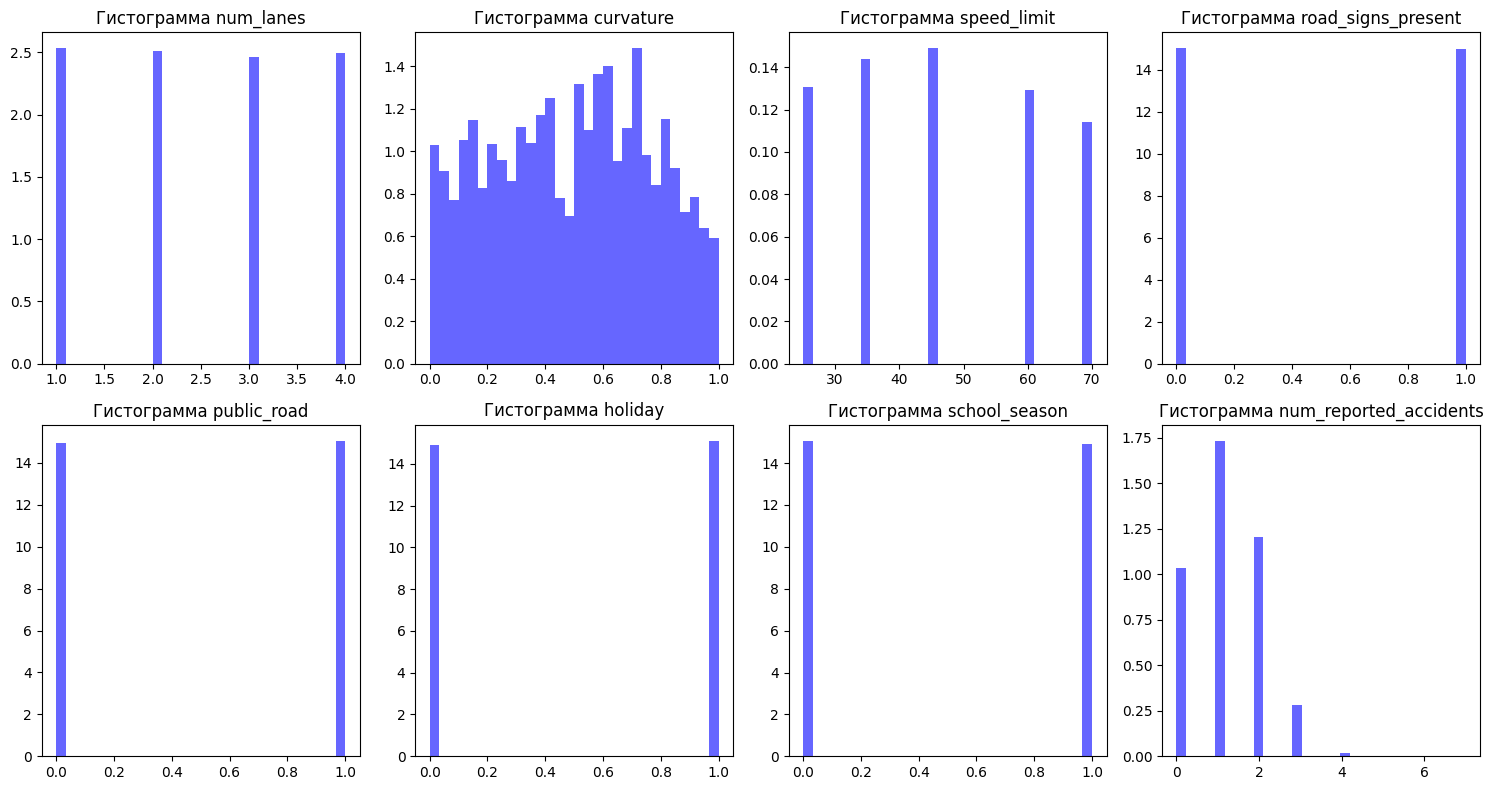

In [12]:
import matplotlib.pyplot as plt

# # Пример данных: 8 столбцов
# data = np.random.randn(1000, 8)  # 1000 строк, 8 столбцов
# columns = [f'feature_{i}' for i in range(8)]
# df = pd.DataFrame(data, columns=columns)

columns = numerical_data.columns[:8]
# Создаём сетку 2x4 (2 строки, 4 столбца)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Плоский список осей для удобного цикла
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].hist(data[col], bins=30, density=True, alpha=0.6, color='b')
    axes[i].set_title(f'Гистограмма {col}')

# Убираем пустые подграфики, если нужно
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
# Числовые признаки
numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

# Бинарные (логические) признаки
binary_features = ['road_signs_present', 'public_road', 'holiday', 'school_season']

In [14]:
y = data['accident_risk']
X = data.drop('accident_risk', axis=1)

## Анализ категориальных атрибутов

In [15]:
cat_features = X.select_dtypes(include=['object'])

In [16]:
cat_features

,road_type,lighting,weather,time_of_day
0,urban,daylight,rainy,afternoon
1,urban,daylight,clear,evening
2,rural,dim,clear,morning
3,highway,dim,rainy,morning
4,rural,daylight,foggy,evening
...,...,...,...,...
517749,highway,daylight,foggy,afternoon
517750,rural,daylight,rainy,morning
517751,urban,daylight,foggy,afternoon
517752,highway,night,clear,afternoon


In [17]:
cat_features.isnull().sum()

,0
road_type,0
lighting,0
weather,0
time_of_day,0


In [18]:
cat_features['road_type'].unique()

array(['urban', 'rural', 'highway'], dtype=object)

In [19]:
cat_features['lighting'].unique()

array(['daylight', 'dim', 'night'], dtype=object)

In [20]:
cat_features['weather'].unique()

array(['rainy', 'clear', 'foggy'], dtype=object)

In [21]:
cat_features['time_of_day'].unique()

array(['afternoon', 'evening', 'morning'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

# train_data = pd.DataFrame({
#     'road_type': ['urban', 'rural', 'highway'],
#     'lighting': ['daylight', 'dim', 'night']
# })

# Создаём OneHotEncoder с handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Обучаем энкодер на тренировке
encoder.fit(cat_features)

# Применяем к тренировке и тесту
train_encoded = pd.DataFrame(
    encoder.transform(cat_features),
    columns=encoder.get_feature_names_out(['road_type', 'lighting', 'weather', 'time_of_day']),
    index=cat_features.index
)

# test_encoded = pd.DataFrame(
#     encoder.transform(test_data),
#     columns=encoder.get_feature_names_out(['road_type', 'lighting']),
#     index=test_data.index
# )

print("Train Encoded:")
print(train_encoded)
# print("\nTest Encoded:")
# print(test_encoded)

Train Encoded:
        road_type_rural  road_type_urban  lighting_dim  lighting_night  \
0                   0.0              1.0           0.0             0.0   
1                   0.0              1.0           0.0             0.0   
2                   1.0              0.0           1.0             0.0   
3                   0.0              0.0           1.0             0.0   
4                   1.0              0.0           0.0             0.0   
...                 ...              ...           ...             ...   
517749              0.0              0.0           0.0             0.0   
517750              1.0              0.0           0.0             0.0   
517751              0.0              1.0           0.0             0.0   
517752              0.0              0.0           0.0             1.0   
517753              0.0              0.0           1.0             0.0   

        weather_foggy  weather_rainy  time_of_day_evening  time_of_day_morning  
0              

## Создание новых атрибутов

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit(X[numerical_features])
X_poly = pd.DataFrame(
    poly.fit_transform(X[numerical_features]),
    columns=poly.get_feature_names_out(numerical_features)
)

In [24]:
X_poly

,num_lanes,curvature,speed_limit,num_reported_accidents,num_lanes^2,num_lanes curvature,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2
0,2.0,0.06,35.0,1.0,4.0,0.12,70.0,2.0,0.0036,2.10,0.06,1225.0,35.0,1.0
1,4.0,0.99,35.0,0.0,16.0,3.96,140.0,0.0,0.9801,34.65,0.00,1225.0,0.0,0.0
2,4.0,0.63,70.0,2.0,16.0,2.52,280.0,8.0,0.3969,44.10,1.26,4900.0,140.0,4.0
3,4.0,0.07,35.0,1.0,16.0,0.28,140.0,4.0,0.0049,2.45,0.07,1225.0,35.0,1.0
4,1.0,0.58,60.0,1.0,1.0,0.58,60.0,1.0,0.3364,34.80,0.58,3600.0,60.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,4.0,0.10,70.0,2.0,16.0,0.40,280.0,8.0,0.0100,7.00,0.20,4900.0,140.0,4.0
517750,4.0,0.47,35.0,1.0,16.0,1.88,140.0,4.0,0.2209,16.45,0.47,1225.0,35.0,1.0
517751,4.0,0.62,25.0,0.0,16.0,2.48,100.0,0.0,0.3844,15.50,0.00,625.0,0.0,0.0
517752,3.0,0.63,25.0,3.0,9.0,1.89,75.0,9.0,0.3969,15.75,1.89,625.0,75.0,9.0


In [25]:
X_added = pd.concat([train_encoded, X_poly, X[binary_features]], axis=1)

In [26]:
X_added

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,num_lanes,curvature,...,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2,road_signs_present,public_road,holiday,school_season
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.06,...,0.0036,2.10,0.06,1225.0,35.0,1.0,0,1,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.99,...,0.9801,34.65,0.00,1225.0,0.0,0.0,1,0,1,1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.63,...,0.3969,44.10,1.26,4900.0,140.0,4.0,0,1,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,0.07,...,0.0049,2.45,0.07,1225.0,35.0,1.0,1,1,0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.58,...,0.3364,34.80,0.58,3600.0,60.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.10,...,0.0100,7.00,0.20,4900.0,140.0,4.0,1,1,0,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.47,...,0.2209,16.45,0.47,1225.0,35.0,1.0,1,1,0,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.62,...,0.3844,15.50,0.00,625.0,0.0,0.0,0,0,0,1
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.63,...,0.3969,15.75,1.89,625.0,75.0,9.0,1,0,1,1


In [27]:
X_added['bad_weather'] = X['weather'].isin(['rainy', 'foggy']).astype(int)
X_added['bad_visivility'] = (X['weather'].isin(['rainy', 'foggy']) & X['lighting'].isin(['dim', 'night'])).astype(int)

In [28]:
X_added

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,num_lanes,curvature,...,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.06,...,0.06,1225.0,35.0,1.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.99,...,0.00,1225.0,0.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.63,...,1.26,4900.0,140.0,4.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,0.07,...,0.07,1225.0,35.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.58,...,0.58,3600.0,60.0,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.10,...,0.20,4900.0,140.0,4.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.47,...,0.47,1225.0,35.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.62,...,0.00,625.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.63,...,1.89,625.0,75.0,9.0,1,0,1,1,0,0


## Тестирование на простой модели

In [29]:
X_norm_test = X_added.copy()

In [30]:
X_norm_test = X_norm_test.drop(['num_reported_accidents^2', 'speed_limit num_reported_accidents', 'speed_limit^2', 'curvature num_reported_accidents', 'curvature', 'num_lanes', 'speed_limit', 'num_reported_accidents', 'num_lanes speed_limit', 'num_lanes num_reported_accidents', 'curvature^2', 'curvature speed_limit', 'num_lanes^2', 'num_lanes curvature'], axis=1)

In [31]:
X_norm_test

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0


In [32]:
features_norm = ['num_reported_accidents^2', 'speed_limit num_reported_accidents', 'speed_limit^2', 'curvature num_reported_accidents', 'curvature', 'num_lanes', 'speed_limit', 'num_reported_accidents', 'num_lanes speed_limit', 'num_lanes num_reported_accidents', 'curvature^2', 'curvature speed_limit', 'num_lanes^2', 'num_lanes curvature']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_norm = pd.DataFrame(
    scaler.fit_transform(X_added[features_norm]),
    columns=features_norm,
    index=X_added.index
)

In [34]:
X_num_norm

,num_reported_accidents^2,speed_limit num_reported_accidents,speed_limit^2,curvature num_reported_accidents,curvature,num_lanes,speed_limit,num_reported_accidents,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,num_lanes^2,num_lanes curvature
0,-0.462347,-0.412481,-0.759581,-0.814729,-1.572918,-0.438680,-0.703840,-0.209797,-0.667064,-0.346572,-1.134835,-1.331952,-0.608849,-1.199431
1,-0.843188,-1.126322,-0.759581,-0.902649,1.839137,1.346344,-0.703840,-1.325918,0.372644,-1.055621,2.445241,0.785795,1.500938,3.020410
2,0.680175,1.729044,1.666411,0.943673,0.518342,1.346344,1.512963,0.906324,2.452060,1.780573,0.307094,1.400625,1.500938,1.437969
3,-0.462347,-0.412481,-0.759581,-0.800075,-1.536229,1.346344,-0.703840,-0.209797,0.372644,0.362476,-1.130069,-1.309181,1.500938,-1.023605
4,-0.462347,0.097406,0.808237,-0.052754,0.334898,-1.331192,0.879591,-0.209797,-0.815593,-0.701097,0.085287,0.795555,-1.136296,-0.693930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.680175,1.729044,1.666411,-0.609582,-1.426163,1.346344,1.512963,0.906324,2.452060,1.780573,-1.111371,-1.013151,1.500938,-0.891735
517750,-0.462347,-0.412481,-0.759581,-0.213941,-0.068678,1.346344,-0.703840,-0.209797,0.372644,0.362476,-0.338162,-0.398322,1.500938,0.734662
517751,-0.843188,-1.126322,-1.155661,-0.902649,0.481653,1.346344,-1.337212,-1.325918,-0.221475,-1.055621,0.261267,-0.460130,1.500938,1.394013
517752,2.584379,0.403338,-1.155661,1.866834,0.518342,0.453832,-1.337212,2.022445,-0.592799,2.135097,0.307094,-0.443864,0.270229,0.745652


In [35]:
X_without_norm = X_added.drop(features_norm, axis=1)

In [36]:
X_without_norm

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Объединяем числовые и бинарные
X_processed = pd.concat([X_num_norm, X_without_norm], axis=1)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Обучение модели
model = LinearRegression()  # или Ridge(), Lasso()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Оценка качества
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.8324
MAE: 0.0531
MSE: 0.0046
RMSE: 0.0680


# Первая отправка 0.06734

In [39]:
test_df = pd.read_csv('/content/drive/MyDrive/Road_risk/test.csv')

In [40]:
test_df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,rural,2,0.01,45,dim,rainy,False,False,afternoon,True,True,2
172581,690335,rural,1,0.74,70,daylight,foggy,False,True,afternoon,False,False,2
172582,690336,urban,2,0.14,70,dim,clear,False,False,evening,True,True,1
172583,690337,urban,1,0.09,45,daylight,foggy,True,True,morning,False,True,0


In [41]:
test_df.isnull().sum()

,0
id,0
road_type,0
num_lanes,0
curvature,0
speed_limit,0
lighting,0
weather,0
road_signs_present,0
public_road,0
time_of_day,0


In [42]:
cat_features_t = test_df.select_dtypes(include=['object'])

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Создаём OneHotEncoder с handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Обучаем энкодер на тренировке
encoder.fit(cat_features_t)

test_encoded = pd.DataFrame(
    encoder.transform(cat_features_t),
    columns=encoder.get_feature_names_out(['road_type', 'lighting', 'weather', 'time_of_day']),
    index=cat_features_t.index
)

print("\nTest Encoded:")
print(test_encoded)


Test Encoded:
        road_type_rural  road_type_urban  lighting_dim  lighting_night  \
0                   0.0              0.0           0.0             1.0   
1                   0.0              1.0           1.0             0.0   
2                   0.0              1.0           1.0             0.0   
3                   1.0              0.0           0.0             0.0   
4                   0.0              0.0           0.0             0.0   
...                 ...              ...           ...             ...   
172580              1.0              0.0           1.0             0.0   
172581              1.0              0.0           0.0             0.0   
172582              0.0              1.0           1.0             0.0   
172583              0.0              1.0           0.0             0.0   
172584              0.0              0.0           0.0             1.0   

        weather_foggy  weather_rainy  time_of_day_evening  time_of_day_morning  
0              

In [44]:
numerical_features_t = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']


In [45]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_t = pd.DataFrame(
    poly.fit_transform(test_df[numerical_features_t]),
    columns=poly.get_feature_names_out(numerical_features_t)
)

In [46]:
X_poly_t

,num_lanes,curvature,speed_limit,num_reported_accidents,num_lanes^2,num_lanes curvature,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2
0,2.0,0.34,45.0,1.0,4.0,0.68,90.0,2.0,0.1156,15.30,0.34,2025.0,45.0,1.0
1,3.0,0.04,45.0,0.0,9.0,0.12,135.0,0.0,0.0016,1.80,0.00,2025.0,0.0,0.0
2,2.0,0.59,35.0,1.0,4.0,1.18,70.0,2.0,0.3481,20.65,0.59,1225.0,35.0,1.0
3,4.0,0.95,35.0,2.0,16.0,3.80,140.0,8.0,0.9025,33.25,1.90,1225.0,70.0,4.0
4,2.0,0.86,35.0,3.0,4.0,1.72,70.0,6.0,0.7396,30.10,2.58,1225.0,105.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,2.0,0.01,45.0,2.0,4.0,0.02,90.0,4.0,0.0001,0.45,0.02,2025.0,90.0,4.0
172581,1.0,0.74,70.0,2.0,1.0,0.74,70.0,2.0,0.5476,51.80,1.48,4900.0,140.0,4.0
172582,2.0,0.14,70.0,1.0,4.0,0.28,140.0,2.0,0.0196,9.80,0.14,4900.0,70.0,1.0
172583,1.0,0.09,45.0,0.0,1.0,0.09,45.0,0.0,0.0081,4.05,0.00,2025.0,0.0,0.0


In [47]:
test_encoded

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
172580,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
172581,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172582,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
172583,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
X_added_t = pd.concat([test_encoded, X_poly_t, test_df[binary_features]], axis=1)

In [49]:
X_added_t['bad_weather'] = test_df['weather'].isin(['rainy', 'foggy']).astype(int)
X_added_t['bad_visivility'] = (test_df['weather'].isin(['rainy', 'foggy']) & test_df['lighting'].isin(['dim', 'night'])).astype(int)

In [50]:
features_norm = ['num_reported_accidents^2', 'speed_limit num_reported_accidents', 'speed_limit^2', 'curvature num_reported_accidents', 'curvature', 'num_lanes', 'speed_limit', 'num_reported_accidents', 'num_lanes speed_limit', 'num_lanes num_reported_accidents', 'curvature^2', 'curvature speed_limit', 'num_lanes^2', 'num_lanes curvature']

In [51]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_num_norm_t = pd.DataFrame(
#     scaler.fit_transform(X_added_t[features_norm]),
#     columns=features_norm,
#     index=X_added_t.index
# )
X_num_norm_t = pd.DataFrame(
    scaler.transform(X_added_t[features_norm]), # <-- ИСПОЛЬЗУЕМ ТОТ ЖЕ scaler, обученный на X_added
    columns=features_norm,
    index=X_added_t.index
)

In [52]:
print(len(test_encoded))
print(len(X_poly_t))
print(len(test_df[binary_features]))

172585
172585
172585


In [53]:
X_without_norm_t = X_added_t.drop(features_norm, axis=1)

In [54]:
X_processed_t = pd.concat([X_num_norm_t, X_without_norm_t], axis=1)

In [55]:
X_processed_t

,num_reported_accidents^2,speed_limit num_reported_accidents,speed_limit^2,curvature num_reported_accidents,curvature,num_lanes,speed_limit,num_reported_accidents,num_lanes speed_limit,num_lanes num_reported_accidents,...,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,-0.462347,-0.208526,-0.231474,-0.404435,-0.545632,-0.438680,-0.070467,-0.209797,-0.370004,-0.346572,...,0.0,0.0,0.0,0.0,True,True,True,True,0,0
1,-0.843188,-1.126322,-0.231474,-0.902649,-1.646295,0.453832,-0.070467,-1.325918,0.298379,-1.055621,...,1.0,0.0,0.0,0.0,True,False,True,False,1,1
2,-0.462347,-0.412481,-0.759581,-0.038101,0.371587,-0.438680,-0.703840,-0.209797,-0.667064,-0.346572,...,0.0,0.0,0.0,0.0,True,False,True,True,0,0
3,0.680175,0.301361,-0.759581,1.881488,1.692382,1.346344,-0.703840,0.906324,0.372644,1.780573,...,0.0,1.0,0.0,0.0,False,False,False,False,1,0
4,2.584379,1.015203,-0.759581,2.877915,1.362183,-0.438680,-0.703840,2.022445,-0.667064,1.071524,...,0.0,0.0,1.0,0.0,True,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,0.680175,0.709270,-0.231474,-0.873342,-1.756362,-0.438680,-0.070467,0.906324,-0.370004,0.362476,...,0.0,1.0,0.0,0.0,False,False,True,True,1,1
172581,0.680175,1.729044,1.666411,1.266047,0.921918,-1.331192,1.512963,0.906324,-0.667064,-0.346572,...,1.0,0.0,0.0,0.0,False,True,False,False,1,0
172582,-0.462347,0.301361,1.666411,-0.697502,-1.279408,-0.438680,1.512963,-0.209797,0.372644,-0.346572,...,0.0,0.0,1.0,0.0,False,False,True,True,0,0
172583,-0.843188,-1.126322,-0.231474,-0.902649,-1.462852,-1.331192,-0.070467,-1.325918,-1.038388,-1.055621,...,1.0,0.0,0.0,1.0,True,True,False,True,1,0


In [56]:
y_final = model.predict(X_processed_t)

In [57]:
y_final

array([0.32903792, 0.16190007, 0.18678509, ..., 0.26211629, 0.17183121,
       0.48182226])

In [58]:
results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.329038
1  517755       0.161900
2  517756       0.186785
3  517757       0.420874
4  517758       0.352518


# Улучшение модели 0.05817

In [59]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Параметры модели (можно настраивать для улучшения качества)
model = XGBRegressor(
    n_estimators=200,      # Количество деревьев
    learning_rate=0.08,     # Скорость обучения
    max_depth=8,           # Максимальная глубина дерева
    random_state=42        # Для воспроизводимости
)

# Обучение модели
print("Обучение XGBoost...")
model.fit(X_train, y_train)

# Предсказания
print("Предсказания XGBoost...")
y_pred = model.predict(X_test)

# Оценка качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- XGBoost ---")
print(f"MSE: {mse:.5f}")
print(f"R²: {r2:.5f}")

# y_final = model.predict(X_processed_t)

# results_df = pd.DataFrame({
#     'id': test_df['id'].values,
#     'accident_risk': y_final
# })

# # Проверим первые строки
# print(results_df.head())

# # Сохраняем в CSV файл
# results_df.to_csv('submission.csv', index=False)

Обучение XGBoost...
Предсказания XGBoost...

--- XGBoost ---
MSE: 0.00317
R²: 0.88515


In [60]:
y_final = model.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.295464
1  517755       0.123245
2  517756       0.180127
3  517757       0.305305
4  517758       0.407763


Подбор гиперпараметров

In [61]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

# # Определяем параметры, которые хотим перебрать
# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1, 0.15],
#     'max_depth': [6, 8, 10],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Создаём базовую модель
# base_model = XGBRegressor(random_state=42)

# # Создаём объект GridSearchCV
# grid_search = GridSearchCV(
#     estimator=base_model,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  # Используем MSE (с минусом, т.к. GridSearch ищет максимум)
#     cv=3,  # 3 фолда кросс-валидации (уменьшите, если обучение слишком долго)
#     n_jobs=-1,  # Использовать все ядра процессора
#     verbose=1   # Печатать прогресс
# )

# # Запускаем поиск
# print("Запуск GridSearchCV...")
# grid_search.fit(X_train, y_train)

# # Лучшая модель
# best_model = grid_search.best_estimator_

# # Предсказания лучшей модели
# y_pred_best = best_model.predict(X_test)

# # Оценка качества лучшей модели
# mse_best = mean_squared_error(y_test, y_pred_best)
# print(f"\n--- Лучшая модель XGBoost (GridSearchCV) ---")
# print(f"Best params: {grid_search.best_params_}")
# print(f"Best CV MSE: {-grid_search.best_score_:.5f}")  # минус, т.к. neg_mean_squared_error
# print(f"Test MSE: {mse_best:.5f}")

--- Лучшая модель XGBoost (GridSearchCV) ---
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
Best CV MSE: 0.00315
Test MSE: 0.00316

Проверка на переобучение

In [62]:
# # Обучите модель
# model = XGBRegressor(n_estimators=200, learning_rate=0.08, max_depth=8, random_state=42)
# model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.5f}")
print(f"Test MSE: {mse_test:.5f}")

# Если MSE_train << MSE_test, возможно, переобучение
if mse_train < mse_test * 0.5:  # Пример грубого условия
    print("Возможно, модель переобучается.")
    # Попробуйте уменьшить n_estimators, max_depth, добавить регуляризацию

Train MSE: 0.00296
Test MSE: 0.00317


Обучение на всей выборке и лучшей модели

In [77]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Параметры модели (можно настраивать для улучшения качества)
model = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=8,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

# Обучение модели
print("Обучение XGBoost...")
model.fit(X_processed, y)

# # # Предсказания
# # print("Предсказания XGBoost...")
# y_pred = model.predict(X_processed)

# # # Оценка качества
# mse = mean_squared_error(y, y_pred)
# # r2 = r2_score(y_test, y_pred)

# # print(f"\n--- XGBoost ---")
# print(f"MSE: {mse:.5f}")
# # print(f"R²: {r2:.5f}")

Обучение XGBoost...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [76]:
y_final = model.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.292498
1  517755       0.121860
2  517756       0.181355
3  517757       0.313621
4  517758       0.392762


# Дополнительный анализ и добавление новых атрибутов

<Axes: xlabel='accident_risk', ylabel='Count'>

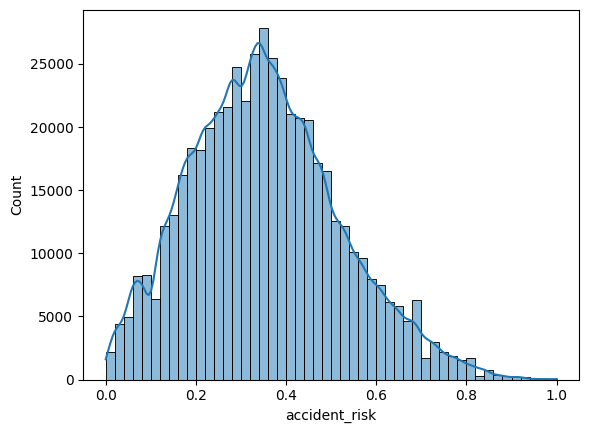

In [66]:
sns.histplot(y, kde = True, bins = 50)

In [67]:
print(np.mean(y))
print(np.median(y))

0.3523774031683
0.34


In [68]:
print(np.mean(y_final))
print(np.median(y_final))

0.35168552
0.33611342


<Axes: ylabel='Count'>

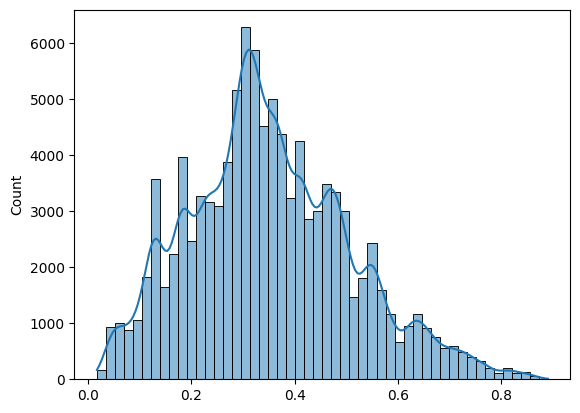

In [69]:
sns.histplot(y_pred, kde = True, bins = 50)

<Axes: ylabel='Count'>

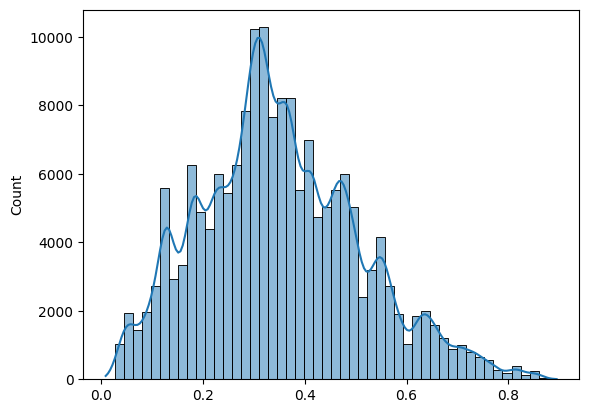

In [70]:
sns.histplot(y_final, kde = True, bins = 50)

ValueError: x and y must be the same size

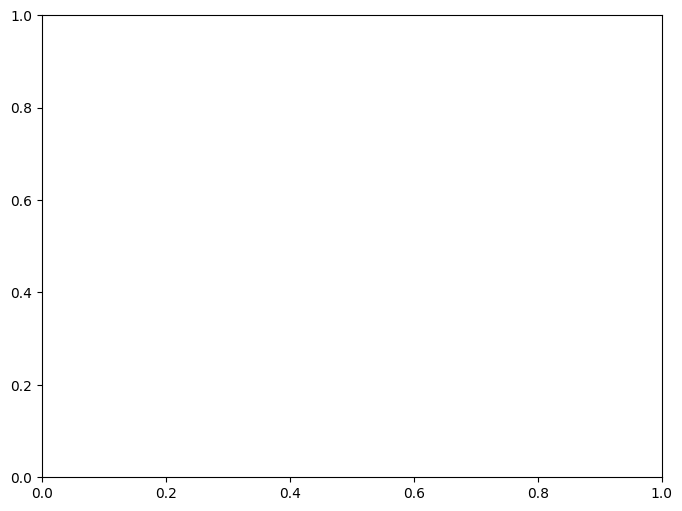

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50)
plt.xlabel('Остатки (y_true - y_pred)')
plt.ylabel('Частота')
plt.title('Распределение остатков')
plt.show()

Попробовать добавить новые атрибуты

In [ ]:
# Получаем коэффициенты
feature_importance = abs(model.coef_)  # берем абсолютные значения

# Создаём DataFrame для удобства
feature_names = X_processed.columns  # имена признаков
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

print(importance_df)

In [ ]:
X_processed['lighting_night'] + X_processed['curvature']

In [ ]:
# target_mean_by_road_type = X_processed.groupby('road_type')['accident_risk'].mean()

In [ ]:
FEATURES = ['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting', 'weather', 'road_signs_present',	'public_road', 'time_of_day', 'holiday', 'school_season', 'num_reported_accidents']

# DO ENCODING FOR EACH X COLUMN
for col in FEATURES:
    mean_encode = data.groupby(col)['accident_risk'].mean()
    std_encode  = data.groupby(col)['accident_risk'].std()

    print(mean_encode)
    print(std_encode)
    print('-'*60)
    # # APPLY MEAN ENCODE
    # train_df[f'mean_{col}'] = train_df[col].map(mean_encode)
    # test_df[f'mean_{col}']  = test_df[col].map(mean_encode)

    # # APPLY STD ENCODE
    # train_df[f'std_{col}'] = train_df[col].map(std_encode)
    # test_df[f'std_{col}']  = test_df[col].map(std_encode)

num_reported_accidents > 2

lighting = 'night'

speed_limit >= 60

curvature >= 0.4?

- num_reported_accidents + curvature
- speed_limit + curvature
- + speed_limit >= 60
- + curvature >= 0.4
- + num_reported_accidents > 2
- lighting = 'night' & speed_limit >= 60
- speed_limit >= 60 & curvature >= 0.4
- lighting = 'night' & curvature >= 0.4
- num_reported_accidents > 2 & speed_limit >= 60

In [78]:
X_processed['large_num_reported_accidents'] = (X_added['num_reported_accidents'] > 2).astype(int)
X_processed['strong_curvature'] = (X_added['curvature'] >= 0.4).astype(int)
X_processed['high_speed_limit'] = (X_added['speed_limit'] >= 60).astype(int)

In [79]:
X_processed['high_speed_night'] = X_processed['lighting_night'] * X_processed['high_speed_limit']
X_processed['high_speed_curvature'] = X_processed['high_speed_limit'] * X_processed['strong_curvature']
X_processed['strong_curvature_night'] = X_processed['strong_curvature'] * X_processed['lighting_night']
X_processed['high_speed_reported_accidents'] = X_processed['large_num_reported_accidents'] * X_processed['high_speed_limit']

In [80]:
X_processed

,num_reported_accidents^2,speed_limit num_reported_accidents,speed_limit^2,curvature num_reported_accidents,curvature,num_lanes,speed_limit,num_reported_accidents,num_lanes speed_limit,num_lanes num_reported_accidents,...,school_season,bad_weather,bad_visivility,large_num_reported_accidents,strong_curvature,high_speed_limit,high_speed_night,high_speed_curvature,strong_curvature_night,high_speed_reported_accidents
0,-0.462347,-0.412481,-0.759581,-0.814729,-1.572918,-0.438680,-0.703840,-0.209797,-0.667064,-0.346572,...,1,1,0,0,0,0,0.0,0,0.0,0
1,-0.843188,-1.126322,-0.759581,-0.902649,1.839137,1.346344,-0.703840,-1.325918,0.372644,-1.055621,...,1,0,0,0,1,0,0.0,0,0.0,0
2,0.680175,1.729044,1.666411,0.943673,0.518342,1.346344,1.512963,0.906324,2.452060,1.780573,...,0,0,0,0,1,1,0.0,1,0.0,0
3,-0.462347,-0.412481,-0.759581,-0.800075,-1.536229,1.346344,-0.703840,-0.209797,0.372644,0.362476,...,0,1,1,0,0,0,0.0,0,0.0,0
4,-0.462347,0.097406,0.808237,-0.052754,0.334898,-1.331192,0.879591,-0.209797,-0.815593,-0.701097,...,0,1,0,0,1,1,0.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.680175,1.729044,1.666411,-0.609582,-1.426163,1.346344,1.512963,0.906324,2.452060,1.780573,...,0,1,0,0,0,1,0.0,0,0.0,0
517750,-0.462347,-0.412481,-0.759581,-0.213941,-0.068678,1.346344,-0.703840,-0.209797,0.372644,0.362476,...,0,1,0,0,1,0,0.0,0,0.0,0
517751,-0.843188,-1.126322,-1.155661,-0.902649,0.481653,1.346344,-1.337212,-1.325918,-0.221475,-1.055621,...,1,1,0,0,1,0,0.0,0,0.0,0
517752,2.584379,0.403338,-1.155661,1.866834,0.518342,0.453832,-1.337212,2.022445,-0.592799,2.135097,...,1,0,0,1,1,0,0.0,0,1.0,0


In [ ]:
    # mean_encode = data[data['curvature'] >= 0.4].groupby('curvature')['accident_risk'].mean()
    # std_encode  = data[data['curvature'] >= 0.4].groupby('curvature')['accident_risk'].std()

    # print(mean_encode)
    # print(std_encode)

In [ ]:
# mean_encode = data.groupby('curvature')['accident_risk'].mean()
# std_encode  = data.groupby('curvature')['accident_risk'].std()

# print(mean_encode)
# print(std_encode)

In [ ]:
# # Разделение на train/test
# X_train, X_test, y_train, y_test = train_test_split(
#     X_processed, y, test_size=0.2, random_state=42
# )

# model.fit(X_train, y_train)

# # Предсказания
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # MSE
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)

# print(f"Train MSE: {mse_train:.5f}")
# print(f"Test MSE: {mse_test:.5f}")

# # Если MSE_train << MSE_test, возможно, переобучение
# if mse_train < mse_test * 0.5:  # Пример грубого условия
#     print("Возможно, модель переобучается.")
#     # Попробуйте уменьшить n_estimators, max_depth, добавить регуляризацию

Добавить признаки

In [81]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Параметры модели (можно настраивать для улучшения качества)
model = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=8,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

# Обучение модели
print("Обучение XGBoost...")
model.fit(X_processed, y)


Обучение XGBoost...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [82]:
X_processed_t['large_num_reported_accidents'] = (X_added_t['num_reported_accidents'] > 2).astype(int)
X_processed_t['strong_curvature'] = (X_added_t['curvature'] >= 0.4).astype(int)
X_processed_t['high_speed_limit'] = (X_added_t['speed_limit'] >= 60).astype(int)

X_processed_t['high_speed_night'] = X_processed_t['lighting_night'] * X_processed_t['high_speed_limit']
X_processed_t['high_speed_curvature'] = X_processed_t['high_speed_limit'] * X_processed_t['strong_curvature']
X_processed_t['strong_curvature_night'] = X_processed_t['strong_curvature'] * X_processed_t['lighting_night']
X_processed_t['high_speed_reported_accidents'] = X_processed_t['large_num_reported_accidents'] * X_processed_t['high_speed_limit']

In [83]:
# model.fit(X_processed, y)

y_final = model.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.292133
1  517755       0.121779
2  517756       0.183068
3  517757       0.317049
4  517758       0.407325


# Тестирование моделей с дополнительными признаками

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Обычная линейная регрессия ---
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.5f}, R²: {r2_lin:.5f}")

# --- 2. Ridge (L2 регуляризация) ---
model_ridge = Ridge(alpha=1.0)  # Попробуйте разные alpha
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge MSE: {mse_ridge:.5f}, R²: {r2_ridge:.5f}")

# --- 3. Lasso (L1 регуляризация) ---
model_lasso = Lasso(alpha=0.1)  # Попробуйте разные alpha
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso:.5f}, R²: {r2_lasso:.5f}")

# --- 4. ElasticNet (L1 + L2) ---
model_enet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha и l1_ratio для настройки
model_enet.fit(X_train, y_train)
y_pred_enet = model_enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)
print(f"ElasticNet MSE: {mse_enet:.5f}, R²: {r2_enet:.5f}")

In [ ]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=12,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
print(mse_XGB)

In [ ]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=10,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
print(mse_XGB)

In [ ]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf', C=1.0, gamma='scale') # Попробуйте разные параметры
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr:.5f}, R²: {r2_svr:.5f}")